In [1]:
import preamble

import apps.generic.dataset as dataset
import examples.dataset as dataset_tool

import pprint as pp
import pandas as pd

In [2]:
trial = "instanceType_suite_1"
df, spec = dataset.load(bucket="perfd", 
                  app_name="influxdb",
                  trial=trial)
df = dataset_tool.add_ins_feature(df, "serverInstanceType")
df

,level_0,index,query_latency_max,query_latency_mean,query_latency_min,query_latency_50pc,query_latency_75pc,query_latency_95pc,query_latency_99pc,numServerInstance,...,Instance_Storage:_already_warmed-up,Instance_Storage:_SSD_TRIM_Support,EBS_Optimized:_Max_Bandwidth,EBS_Optimized:_Throughput,EBS_Optimized:_Max_16K_IOPS,EBS_Exposed_as_NVMe,Enhanced_Networking,IPv6_Support,EBS_Optimized_surcharge,EMR_cost
0,0,0,0.462735,0.371403,0.322260,0.359803,0.374065,0.462735,0.462735,5,...,0.0,0.0,3500.0,437.5,20000.0,0.0,1.0,1.0,0.0,0.043
1,1,1,0.488478,0.389899,0.324747,0.377862,0.400390,0.488478,0.488478,5,...,0.0,0.0,3500.0,437.5,18750.0,0.0,0.0,1.0,0.0,0.063
2,2,2,0.423455,0.387096,0.359005,0.386243,0.395833,0.423455,0.423455,5,...,0.0,0.0,3500.0,437.5,18750.0,0.0,0.0,1.0,0.0,0.063
3,3,3,0.407018,0.369510,0.323788,0.369712,0.390965,0.407018,0.407018,5,...,0.0,0.0,3500.0,437.5,20000.0,0.0,1.0,1.0,0.0,0.043
4,4,4,0.382885,0.353738,0.322475,0.356725,0.372450,0.382885,0.382885,5,...,0.0,0.0,3500.0,437.5,20000.0,0.0,1.0,1.0,0.0,0.043
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
75,75,75,0.389710,0.358023,0.323698,0.354353,0.380070,0.389710,0.389710,5,...,0.0,0.0,3500.0,437.5,18750.0,0.0,1.0,1.0,0.0,0.048
76,76,76,0.347990,0.329435,0.312340,0.328072,0.337010,0.347990,0.347990,5,...,0.0,0.0,3500.0,437.5,18750.0,0.0,1.0,1.0,0.0,0.096
77,77,77,0.364965,0.343085,0.315947,0.346762,0.356023,0.364965,0.364965,5,...,0.0,0.0,3500.0,437.5,18750.0,0.0,1.0,1.0,0.0,0.048
78,78,78,0.364443,0.330721,0.306003,0.326593,0.339593,0.364443,0.364443,5,...,0.0,0.0,3500.0,437.5,18750.0,0.0,1.0,1.0,0.0,0.096


hyptertune: start tuning..
(39, 18) (39,)
Search took 1.16 seconds parameter settings.
Model with rank: 1
Mean validation score: -5.415 (std: 4.065)
Parameters: {'fit_intercept': True, 'normalize': True}

[('linear_regression', {'fit_intercept': True, 'normalize': True})]
hyptertune: took 1 s
hyptertune: start tuning..
(39, 18) (39,)
Search took 1.35 seconds parameter settings.
Model with rank: 1
Mean validation score: -3.007 (std: 2.221)
Parameters: {'algorithm': 'auto', 'n_neighbors': 16, 'weights': 'uniform'}

[('nearest_neighbors', {'algorithm': 'auto', 'n_neighbors': 16, 'weights': 'uniform'})]
hyptertune: took 1 s
hyptertune: start tuning..
(39, 18) (39,)
Search took 6.07 seconds parameter settings.
Model with rank: 1
Mean validation score: -0.951 (std: 0.066)
Parameters: {'bootstrap': True, 'max_depth': 100, 'max_features': 'sqrt', 'min_samples_leaf': 10, 'min_samples_split': 10, 'n_estimators': 1}

[('random_forest', {'bootstrap': True, 'max_depth': 100, 'max_features': 'sqrt',

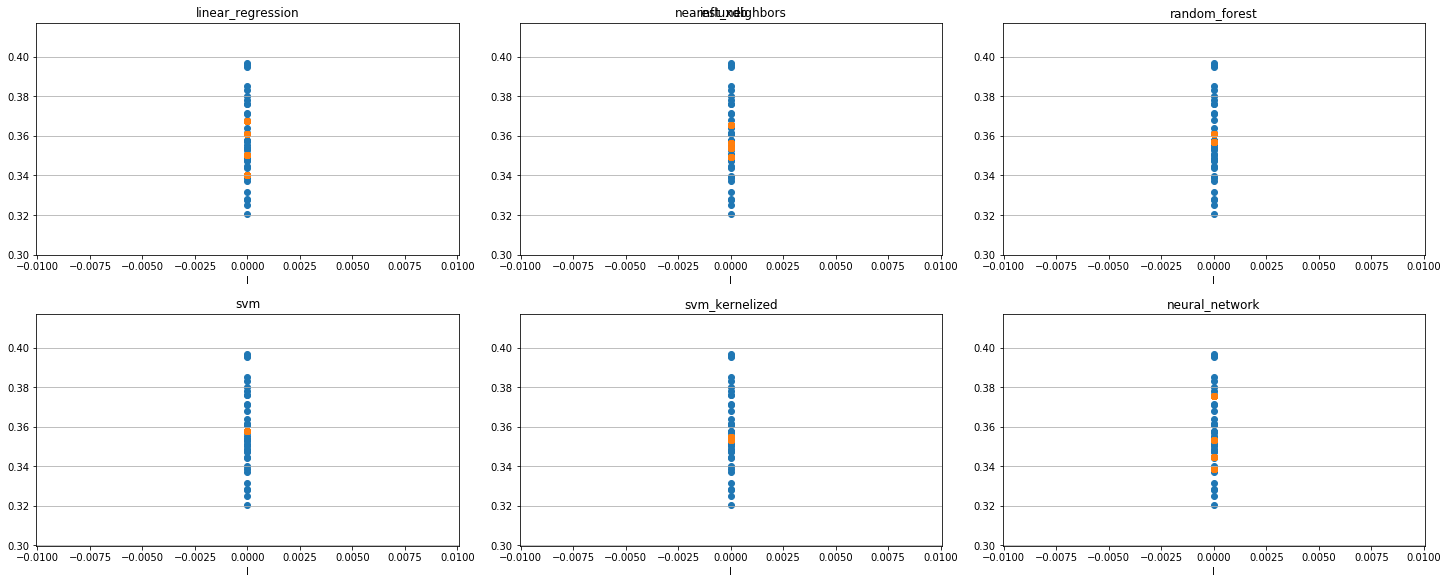

In [3]:
ctx = dataset_tool.default_ctx()
ctx["exp_name"] = trial
ctx["app_name"] = "influxdb"
ctx["feature"] = ctx["feature_mode"] = dataset_tool.get_ins_feature()
ctx["target_feature"] = "query_latency_mean"
ctx["testset_ratio"] = 0.5
ctx["retune"] = False
results = dataset_tool.best_case_eval(ctx, {"influxdb": df})

hyptertune: start tuning..
(39, 18) (39,)
Search took 1.27 seconds parameter settings.
Model with rank: 1
Mean validation score: -1.827 (std: 0.644)
Parameters: {'fit_intercept': False, 'normalize': True}

[('linear_regression', {'fit_intercept': False, 'normalize': True})]
hyptertune: took 1 s
hyptertune: start tuning..
(39, 18) (39,)
Search took 1.33 seconds parameter settings.
Model with rank: 1
Mean validation score: -1.271 (std: 0.232)
Parameters: {'algorithm': 'ball_tree', 'n_neighbors': 16, 'weights': 'uniform'}

[('nearest_neighbors', {'algorithm': 'ball_tree', 'n_neighbors': 16, 'weights': 'uniform'})]
hyptertune: took 1 s
hyptertune: start tuning..
(39, 18) (39,)
Search took 6.32 seconds parameter settings.
Model with rank: 1
Mean validation score: -0.978 (std: 0.040)
Parameters: {'bootstrap': True, 'max_depth': 100, 'max_features': 'auto', 'min_samples_leaf': 10, 'min_samples_split': 10, 'n_estimators': 1}

[('random_forest', {'bootstrap': True, 'max_depth': 100, 'max_featur

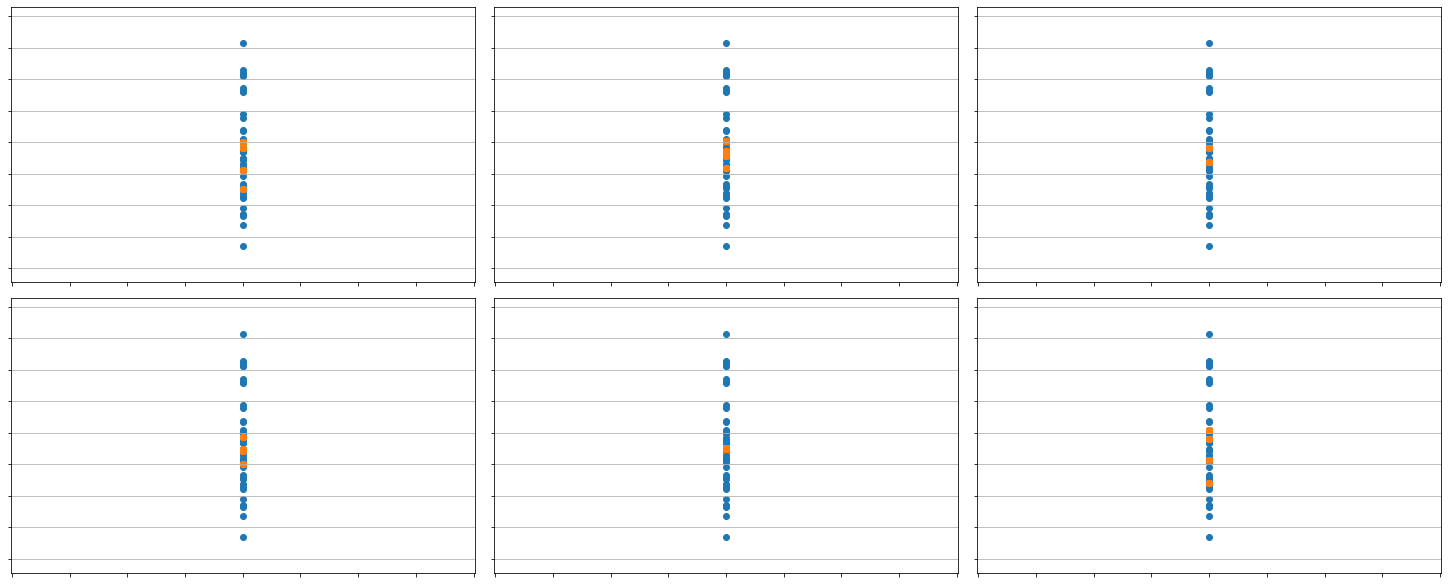

In [4]:
ctx = dataset_tool.default_ctx()
ctx["exp_name"] = trial
ctx["app_name"] = "influxdb"
ctx["feature"] = ctx["feature_mode"] = dataset_tool.get_ins_feature()
ctx["target_feature"] = "query_latency_99pc"
ctx["testset_ratio"] = 0.5
ctx["retune"] = False
results = dataset_tool.best_case_eval(ctx, {"influxdb": df})